In [1]:
import numpy as np
from scipy import stats
import arms
import matplotlib.pyplot as plt
from MAB import SMAB, BernoulliBandit
from ExplorationMAB import NaiveExploration, UCB1, ThompsonSampling
SEED = 1

## Bernoulli Multi-Arm Bandit

In [12]:
nr_arms = 10

bernoulli_MAB = BernoulliBandit(nr_arms=nr_arms, seed=SEED)
horizon = 5000
complexity = bernoulli_MAB.complexity()

In [16]:
print("Complexity : ", round(complexity, 3))

Complexity :  10.681


In [14]:
naive = NaiveExploration(bernoulli_MAB, horizon)
ucb1 = UCB1(bernoulli_MAB, horizon, rho=0.2)
ts = ThompsonSampling(bernoulli_MAB, horizon)

In [15]:
nr_simulations = 10


reg_naive = naive.compute_mean_regret(nr_simulations)
reg_UCB1 = ucb1.compute_mean_regret(nr_simulations)
reg_TS = ts.compute_mean_regret(nr_simulations)

/Users/dieze/Documents/MVA/RL/homeworks/reinforcement_learning/HWK2/1_sMAB/ExplorationMAB.py:74: RuntimeWarning: invalid value encountered in true_divide
  self.empiric_mean_ = cum_reward_t / cum_draws_t


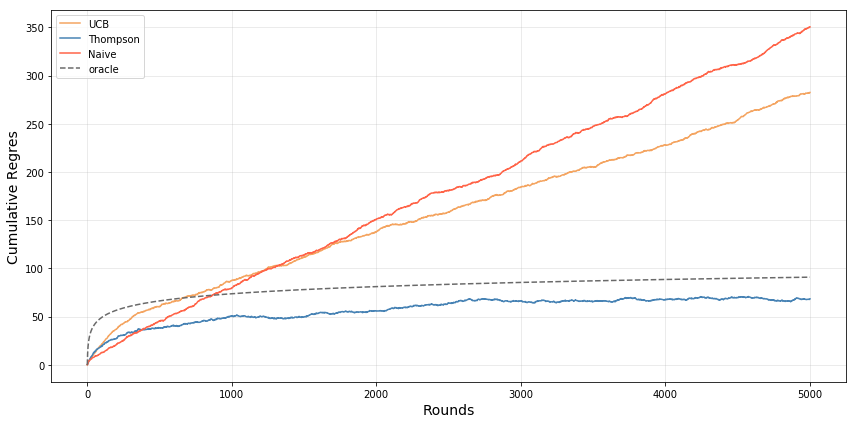

In [20]:
fig, ax = plt.subplots(figsize=(12,6))

x = np.arange(1, horizon + 1)
oracle = complexity * np.log(x)

ax.plot(x, reg_UCB1, label="UCB", color="sandybrown")
ax.plot(x, reg_TS, label="Thompson", color="steelblue")
ax.plot(x, reg_naive, label="Naive", color="tomato")
ax.plot(x, oracle, label="oracle", linestyle='--', color="dimgrey")
ax.grid(alpha=0.3)
ax.set_xlabel("Rounds", size=14)
ax.set_ylabel("Cumulative Regret", size=14)

plt.legend()
plt.tight_layout()
plt.show()

## Non-parametric bandit

We adapt the Bernoulli Thompson sampling to general stochastic bandits following an idea introduced in this [paper](https://arxiv.org/pdf/1111.1797) :

Assuming a given arm has an arbitrary distribution with support $[0,1]$, if this arm is drawn at time $t$, we observe a reward $\tilde{r}_{t}\in[0,1]$. We then perform a Bernoulli trial with success probability $\tilde{r}_{t}$ and observe $r_{t}$.

Let $f$ and $\mu$ denote the distribution and mean of the arm, we henceforth verify :

$$
\mathbb{P}(r_{t}=1)=\int_{0}^{1}\tilde{r}f(\tilde{r})d \tilde{r} = \mathbb{E}_{X\sim f}[X] = \mu
$$

It thus behaves like the Bernoulli Thomson-Sampling and we can apply the previous algorithm

In [120]:
arm1 = arms.ArmBernoulli(p=0.45, random_state=SEED)
arm2 = arms.ArmBeta(a=1., b=5., random_state=SEED)
arm3 = arms.ArmExp(L=2., random_state=SEED)
arm4 = arms.ArmBeta(a=1., b=2., random_state=SEED)
arm5 = arms.ArmExp(L=.5, random_state=SEED)

X = np.linspace(0,1,50)
P = stats.norm(loc=0.14, scale=0.3).pdf(X)
P = P / np.sum(P)
arm6 = arms.ArmFinite(X=X, P=P)

my_arms = [arm1, arm2, arm3, arm4, arm5, arm6]
my_MAB = SMAB(my_arms)

In [143]:
horizon = 8000

ucb1 = UCB1(my_MAB, horizon, rho=0.2)
ts = ThompsonSampling(my_MAB, horizon)

In [144]:
nr_simulations = 40


reg_UCB1 = ucb1.compute_mean_regret(nr_simulations)
reg_TS = ts.compute_mean_regret(nr_simulations)

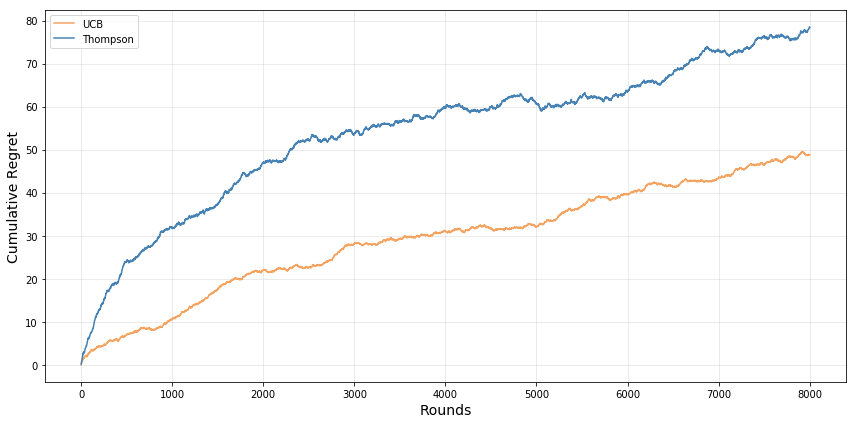

In [145]:
fig, ax = plt.subplots(figsize=(12,6))

x = np.arange(1, horizon + 1)

ax.plot(x, reg_UCB1, label="UCB", color="sandybrown")
ax.plot(x, reg_TS, label="Thompson", color="steelblue")
ax.grid(alpha=0.3)
ax.set_xlabel("Rounds", size=14)
ax.set_ylabel("Cumulative Regret", size=14)

plt.legend()
plt.tight_layout()
plt.show()